# Configure Python Environment
Ensure the required libraries are available and import the modules needed for linear regression.

In [1]:
# Install essential libraries when running in a fresh environment
%pip install -q scikit-learn matplotlib pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

plt.style.use("seaborn-v0_8")
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


# Load Sample Housing Dataset
Create a small dataset that links square footage to simulated sale prices.

In [2]:
data = pd.DataFrame({
    "square_feet": [650, 720, 800, 850, 900, 950, 1000, 1100, 1200, 1300],
    "price": [185000, 199000, 212000, 219000, 230000, 236000, 245000, 260000, 275000, 290000]
})
data

,square_feet,price
0,650,185000
1,720,199000
2,800,212000
3,850,219000
4,900,230000
5,950,236000
6,1000,245000
7,1100,260000
8,1200,275000
9,1300,290000


# Prepare Features and Targets
Separate the feature matrix and target vector in the format expected by scikit-learn.

In [3]:
X = data[["square_feet"]]
y = data["price"]

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (10, 1)
Target shape: (10,)


# Split Data into Train and Test Sets
Create reproducible training and testing partitions to evaluate generalization.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
 )

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 8
Testing samples: 2


# Train Linear Regression Model
Fit a simple linear regression model to learn the relationship between square footage and price.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Fitted intercept (b): {model.intercept_:.2f}")
print(f"Fitted slope (w): {model.coef_[0]:.2f}")

Fitted intercept (b): 82823.19
Fitted slope (w): 160.85


# Evaluate Model Performance
Compare predictions to the test data and compute common regression metrics.

In [6]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:,.2f}")
print(f"R-squared: {r2:.3f}")

Mean Squared Error: 421,727.80
R-squared: 1.000


# Visualize Predictions vs Actuals
Plot the predicted prices against the actual sale prices with an ideal reference line.

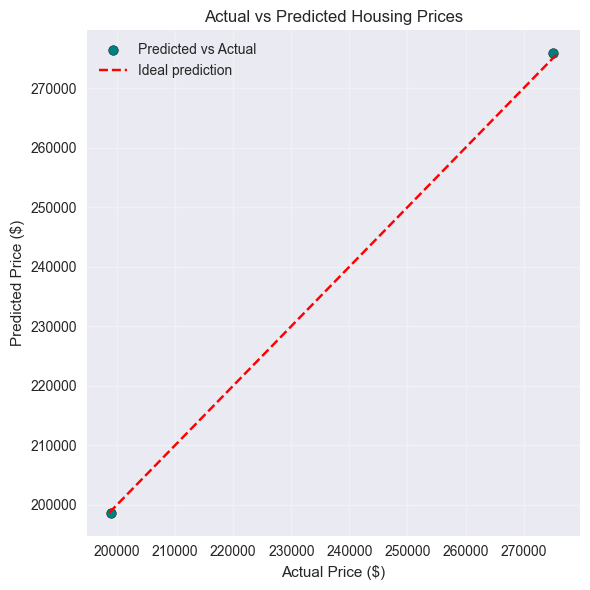

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color="teal", edgecolor="black", label="Predicted vs Actual")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", label="Ideal prediction")

plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Explanation
- **Slope (`w`)**: shows how much the predicted price rises for each extra square foot; here it captures the per-square-foot value increase.
- **Intercept (`b`)**: estimates the baseline price when square footage is zero, giving a starting reference for the line.
- **Mean Squared Error (MSE)**: averages the squared gaps between predicted and actual prices, so lower numbers mean predictions stay closer to reality.
- **R-squared**: reports the share of price variation explained by the model (1.0 is perfect), revealing how well the model captures trends in the data.
- **Prediction plot**: compares predicted vs actual prices; points tightly hugging the red dashed identity line confirm that the fitted line generalizes nicely to the test set.